In [1]:
import pandas_datareader as pdr

In [2]:
import csv

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('tataglbl.csv')

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df1=df.reset_index()['Last']

In [8]:
df1

0       233.50
1       233.80
2       235.00
3       236.25
4       234.00
         ...  
2030    118.80
2031    117.10
2032    120.35
2033    120.75
2034    121.10
Name: Last, Length: 2035, dtype: float64

In [9]:
df1.shape

(2035,)

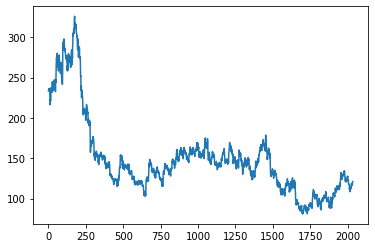

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.62257604]
 [0.62380078]
 [0.62869973]
 ...
 [0.16064503]
 [0.16227802]
 [0.16370688]]


In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1322, 713)

In [16]:
train_data

array([[0.62257604],
       [0.62380078],
       [0.62869973],
       ...,
       [0.25290876],
       [0.26005307],
       [0.2567871 ]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
20/20 [==============================] - 21s 536ms/step - loss: 0.0252 - val_loss: 0.0059
Epoch 2/10
20/20 [==============================] - 19s 965ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/10
20/20 [==============================] - 20s 987ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/10
20/20 [==============================] - 15s 749ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/10
20/20 [==============================] - 15s 779ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/10
20/20 [==============================] - 15s 735ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/10
20/20 [==============================] - 15s 767ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/10
20/20 [==============================] - 15s 766ms/step - loss: 0.0013 - val_loss: 9.

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.8.0-rc1'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.76672196183745

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

118.5230205944686

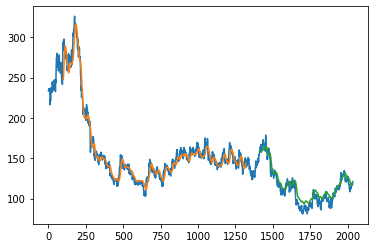

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

713

In [36]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.12410696060420495,
 0.13798734435599097,
 0.14166156358440496,
 0.13778322106552354,
 0.1326801388038375,
 0.14104919371300262,
 0.13676260461318634,
 0.1306389058991631,
 0.13104715248009796,
 0.1306389058991631,
 0.12451520718513981,
 0.14696876913655849,
 0.14798938558889568,
 0.15513370075525618,
 0.13921208409879565,
 0.15717493365993057,
 0.16125739946927942,
 0.1796284956113492,
 0.178607879159012,
 0.19310063278220047,
 0.20902224943866088,
 0.1906511532965911,
 0.18044498877321902,
 0.1824862216778934,
 0.17697489283527246,
 0.17677076954480508,
 0.18044498877321902,
 0.1775872627066748,
 0.17595427638293526,
 0.19840783833435394,
 0.19044703000612373,
 0.18738518064911203,
 0.19432537252500504,
 0.1967748520106144,
 0.20228618085323535,
 0.1967748520106144,
 0.20004082465809347,
 0.199836701367626,
 0.20208205756276787,
 0.21310471524800978,
 0.21555419473361914,
 0.2049397836293121,
 0.21739130434782605,
 0.21269646866707492,
 0.21535007144315166,
 0.19799959175341908,
 0

In [39]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)                                            

[0.15535614]
101
1 day input [0.13798734 0.14166156 0.13778322 0.13268014 0.14104919 0.1367626
 0.13063891 0.13104715 0.13063891 0.12451521 0.14696877 0.14798939
 0.1551337  0.13921208 0.15717493 0.1612574  0.1796285  0.17860788
 0.19310063 0.20902225 0.19065115 0.18044499 0.18248622 0.17697489
 0.17677077 0.18044499 0.17758726 0.17595428 0.19840784 0.19044703
 0.18738518 0.19432537 0.19677485 0.20228618 0.19677485 0.20004082
 0.1998367  0.20208206 0.21310472 0.21555419 0.20493978 0.2173913
 0.21269647 0.21535007 0.19799959 0.18983466 0.17636252 0.17391304
 0.16350276 0.16431925 0.17187181 0.17370892 0.1796285  0.17391304
 0.1612574  0.16942233 0.178812   0.17207593 0.16901408 0.17187181
 0.17513778 0.18309859 0.19024291 0.18595632 0.19003878 0.1735048
 0.1673811  0.16921821 0.17023882 0.16227802 0.15064299 0.15207185
 0.15105123 0.14696877 0.14594815 0.14553991 0.12390284 0.13206777
 0.11226781 0.119208   0.12655644 0.13512962 0.12982241 0.13431313
 0.12676056 0.1314554  0.12737293 0.

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

2035

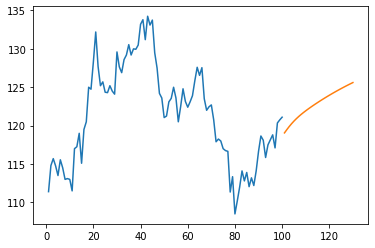

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

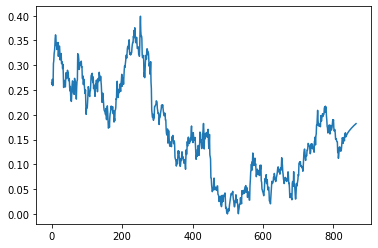

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

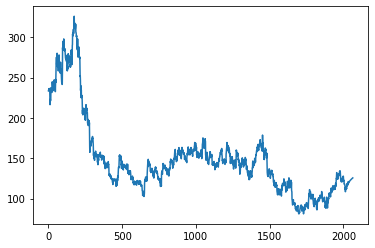

In [46]:
plt.plot(df3)